In [1]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
from sklearn.metrics.cluster import adjusted_rand_score, silhouette_score

In [2]:
x, y = make_moons(n_samples=200, noise=0.05, random_state=0)

In [3]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

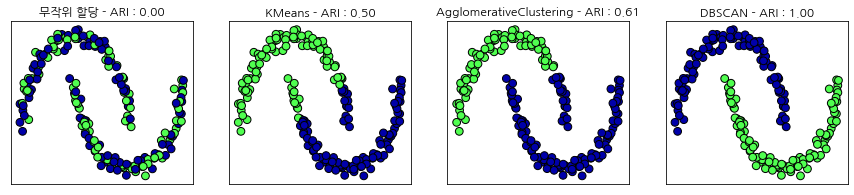

In [4]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(x))

axes[0].scatter(x_scaled[:,0], x_scaled[:,1], c=random_clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title('무작위 할당 - ARI : {:.2f}'.format(adjusted_rand_score(y, random_clusters)))

for ax, algorithms in zip(axes[1:], algorithms):
    clusters = algorithms.fit_predict(x_scaled)
    ax.scatter(x_scaled[:,0], x_scaled[:,1], c=clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title("{} - ARI : {:.2f}".format(algorithms.__class__.__name__, adjusted_rand_score(y, clusters)))

In [5]:
cluster1 = [0, 0, 1, 1, 0]
cluster2 = [1, 1, 0, 0, 1]

print('정확도 : {:.2f}'.format(accuracy_score(cluster1, cluster2)))
print('ARI : {:.2f}'.format(adjusted_rand_score(cluster1, cluster2)))

정확도 : 0.00
ARI : 1.00


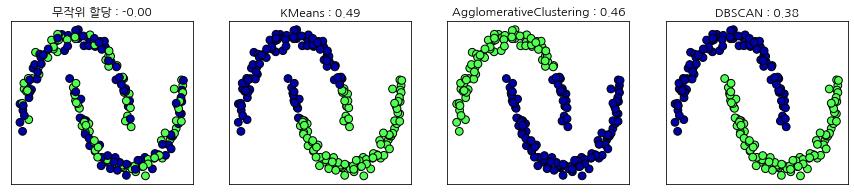

In [6]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(x))

axes[0].scatter(x_scaled[:,0], x_scaled[:,1], c=random_clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title('무작위 할당 : {:.2f}'.format(silhouette_score(x_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

for ax, algorithms in zip(axes[1:], algorithms):
    clusters = algorithms.fit_predict(x_scaled)
    ax.scatter(x_scaled[:,0], x_scaled[:,1], c=clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title("{} : {:.2f}".format(algorithms.__class__.__name__, silhouette_score(x_scaled, clusters)))